<a href="https://colab.research.google.com/github/immy78/Deep_Learning/blob/master/Droupout_%26_Batchnormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 37.47 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [ ]:
train_data_dir = '/content/dog-cat-full-dataset/data/train'
test_data_dir = '/content/dog-cat-full-dataset/data/test'

In [ ]:
img_width =32
img_hight =32
batch_size =20

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_genrator = datagen.flow_from_directory(directory=train_data_dir,target_size=(img_width,img_hight),
                                             classes = ['dogs','cats'],
                                             class_mode ='binary',
                                             batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [ ]:
train_genrator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
validation_genrator = datagen.flow_from_directory(directory=test_data_dir,
                                                  target_size =(32,32),
                                                  classes =['dogs','cats'],
                                                  class_mode ='binary',
                                                  batch_size=20)
                                                  

Found 5000 images belonging to 2 classes.


In [ ]:
 model = Sequential()
 model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',
                  activation='relu',input_shape=( 32,32,3)))
 
 model.add(MaxPool2D(pool_size=(2,2)))
 model.add(Flatten())
 model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
 model.add(Dense(1,activation='sigmoid',))


In [ ]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_genrator,steps_per_epoch=len(train_genrator),epochs=5,
                              validation_data= validation_genrator,validation_steps = len(validation_genrator),verbose =1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1000/1000 [==============================] - 91s 91ms/step - loss: 0.7006 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 89s 89ms/step - loss: 0.6935 - accuracy: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 3/5
1000/1000 [==============================] - 89s 89ms/step - loss: 0.6907 - accuracy: 0.5113 - val_loss: 0.6889 - val_accuracy: 0.5176
Epoch 4/5
1000/1000 [==============================] - 89s 89ms/step - loss: 0.6748 - accuracy: 0.5644 - val_loss: 0.6604 - val_accuracy: 0.6078
Epoch 5/5
1000/1000 [==============================] - 88s 88ms/step - loss: 0.6319 - accuracy: 0.6502 - val_loss: 0.5808 - val_accuracy: 0.7040


In [ ]:
history.history

{'accuracy': [0.49950000643730164,
  0.4930500090122223,
  0.5113000273704529,
  0.5643500089645386,
  0.6502000093460083],
 'loss': [0.7005981802940369,
  0.6935468912124634,
  0.6907054781913757,
  0.6748268008232117,
  0.6318672299385071],
 'val_accuracy': [0.5,
  0.4997999966144562,
  0.5175999999046326,
  0.6078000068664551,
  0.7039999961853027],
 'val_loss': [0.6931841373443604,
  0.693142294883728,
  0.6889244914054871,
  0.6603773236274719,
  0.580771267414093]}

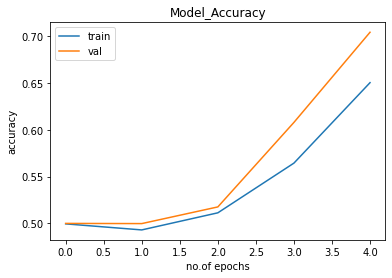

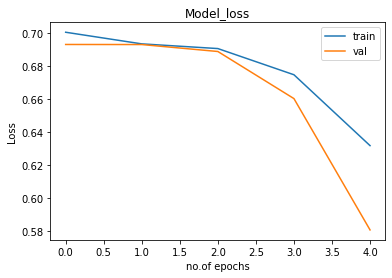

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no.of epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.title('Model_Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no.of epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.title('Model_loss')
plt.show()

## First three block of VGG16 Model

In [ ]:
 model = Sequential()
 model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',
                  activation='relu',input_shape=( 32,32,3)))
 
 model.add(MaxPool2D(pool_size=(2,2)))

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model = Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))



 model.add(Flatten())
 model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))

 model.add(Dense(1,activation='sigmoid',))


In [ ]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_genrator,steps_per_epoch=len(train_genrator),epochs=5,
                              validation_data= validation_genrator,validation_steps = len(validation_genrator),verbose =1)

Epoch 1/5
1000/1000 [==============================] - 149s 149ms/step - loss: 0.7134 - accuracy: 0.4936 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 151s 151ms/step - loss: 0.6934 - accuracy: 0.5022 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 155s 155ms/step - loss: 0.6935 - accuracy: 0.4986 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 150s 150ms/step - loss: 0.6934 - accuracy: 0.5035 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 155s 155ms/step - loss: 0.6936 - accuracy: 0.4971 - val_loss: 0.6932 - val_accuracy: 0.5000


#### Here we have increased the complexity of my model, thts way accuracy is become so poor. now we introduce the concept of Droupout and batch Normalization to incresed the acuuracy of my VGG16 model.

In [ ]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',activation='relu',input_shape=( 32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid',))

In [ ]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_genrator,steps_per_epoch=len(train_genrator),epochs=10,
                              validation_data= validation_genrator,validation_steps = len(validation_genrator),verbose =1)

Epoch 1/10
1000/1000 [==============================] - 204s 204ms/step - loss: 0.6701 - accuracy: 0.6327 - val_loss: 0.6211 - val_accuracy: 0.6420
Epoch 2/10
1000/1000 [==============================] - 203s 203ms/step - loss: 0.5898 - accuracy: 0.6933 - val_loss: 0.5494 - val_accuracy: 0.7306
Epoch 3/10
1000/1000 [==============================] - 203s 203ms/step - loss: 0.5507 - accuracy: 0.7239 - val_loss: 0.5893 - val_accuracy: 0.7014
Epoch 4/10
1000/1000 [==============================] - 205s 205ms/step - loss: 0.5315 - accuracy: 0.7357 - val_loss: 0.5427 - val_accuracy: 0.7342
Epoch 5/10
1000/1000 [==============================] - 199s 199ms/step - loss: 0.5149 - accuracy: 0.7513 - val_loss: 0.5901 - val_accuracy: 0.6990
Epoch 6/10
1000/1000 [==============================] - 200s 200ms/step - loss: 0.4983 - accuracy: 0.7605 - val_loss: 0.5274 - val_accuracy: 0.7494
Epoch 7/10
1000/1000 [==============================] - 202s 202ms/step - loss: 0.4842 - accuracy: 0.7689 - val_

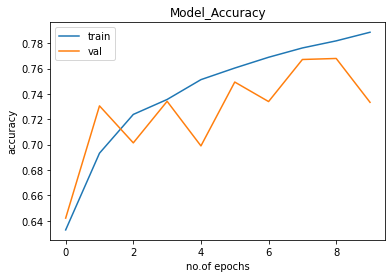

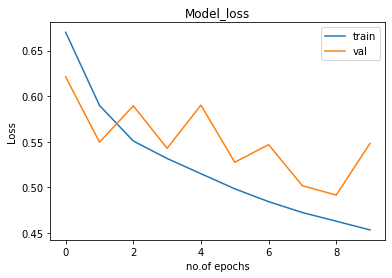

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no.of epochs')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.title('Model_Accuracy')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no.of epochs')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.title('Model_loss')
plt.show()